In [13]:
import matplotlib.pyplot as plt
import cv2
#Technically not necessary in newest versions of jupyter
%matplotlib inline

In [14]:
cat4=cv2.imread('C:/6-computer_vision/CATS_DOGS/CAT/4.jpg')
cat_4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [15]:
cat4.shape

(375, 500, 3)

In [18]:
dog2=cv2.imread('C:/6-Computer_vision/CATS_DOGS/DOG/2.jpg')
dog2=cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [19]:
dog2.shape

(199, 188, 3)

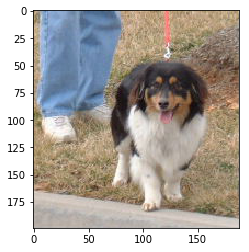

In [20]:
plt.imshow(dog2)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
image_gen=ImageDataGenerator(rotation_range=30,#rotate the image 30 degree
                            width_shift_range=0.1,#shift the pic width by a max of Image
                            height_shift_range=0.1,#shift the pic height by a max of image
                    
                            rescale=1/255,#rescale the image by normalizing it.
                            shear_range=0.2,#shear means cutting away part of the image
                            zoom_range=0.2,#zoom in by 20% max
                            horizontal_flip=True,#allow horizontal flipping
                            fill_mode='nearest'#fill in the missing pixels with the nearest value
                            )

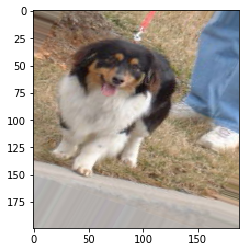

In [23]:
plt.imshow(image_gen.random_transform(dog2))

In [25]:
image_gen.flow_from_directory('C:/6-computer_vision/CATS_DOGS/train')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/6-computer_vision/CATS_DOGS/train'

found 18743 images belonging to 2 classes

In [26]:
image_gen.flow_from_directory('C:/6-computer_vision/CATS_DOGS/test')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/6-computer_vision/CATS_DOGS/test'

found 6251 images belonging to 2 classes.

Resizing Images

lets have keras resize all the images to 150 pixels by 150 pixels once they've been manipulated

In [27]:
#width ,height,channels
images_shape=(150,150,3)

Creating the model

In [29]:
from keras.models import Sequential
from keras.layers import Activation ,Dropout,Flatten,Dense,Conv2D,MaxPooling2D

In [31]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

In [33]:
model.add(Dense(128))
model.add(Activation('relu'))

#Dropouts help reduce overfitting by randomly turnoing neurons off during training
#here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

#lasy year,remember its binary,0=cat,1-dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [ ]:
batch_size=16

train_image_gen=image_gen.flow_from_director

In [35]:
train_images_gen.class_indices

NameError: name 'train_images_gen' is not defined

In [36]:
import warnings 
warnings.filterwarnings('ignore')

In [37]:
results=model.fit_generator(train_image_gen,epochs=10,
                           steps_per_epoch=15,
                           validation_data=test_image_gen,
                           validation_steps=12)

NameError: name 'train_image_gen' is not defined

Evaluating the model

In [40]:
results.history['acc']

NameError: name 'results' is not defined

In [41]:
plt.plot(results.history['acc'])

NameError: name 'results' is not defined